In [12]:
from functions import get_gz_array, get_coords_and_mask, calculate_delta_gs_triaxial, plot_colourmap_gz, calculate_internal_g, calculate_delta_gs_oblate, calculate_delta_gs_prolate
from functions import plot_gz_decay_comparison, calculate_lambda
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(threshold=sys.maxsize)

# lambda works 
# prolate/oblate work 
# get_coords works
# triaxial works with arrays too.

x, y, z, internal = get_coords_and_mask(region = (-10, 10, -10, 10), spacing=0.5, extra_coords=0, a=4, b=3, c=3)

#fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#surf = ax.plot_surface(x, y, z, cmap=cm.jet)


all_lam, theta_internal = calculate_lambda(x, y, z, a=4, b=3, c=3)

ValueError: too many values to unpack (expected 2)

0.8087614398499994


NameError: name 'theta_internal' is not defined

In [5]:
x, y, z, internal = get_coords_and_mask(region = (-6, 6, -6, 6), spacing=0.5, extra_coords=1, a=5, b=4, c=3)
#print(internal)
#print(z)

m, n, p = calculate_internal_g(x, y, z, 5, 4, 3, 1000)

print(p)

[[-4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07]
 [-4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07]
 [-4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.15165236e-07 -4.15165236e-07
  -4.15165236e-07 -4.15165236e-07 -4.1

In [6]:
g1, g2, g3 = calculate_delta_gs_triaxial(x, y, z, a=5, b=4, c=3, density=1000)
print(g3)

[[-3.68676643e-08 -4.17495438e-08 -4.71577251e-08 -5.30538621e-08
  -5.93517867e-08 -6.59075294e-08 -7.25144712e-08 -7.89070060e-08
  -8.47751387e-08 -8.97902946e-08 -9.36397371e-08 -9.60642904e-08
  -9.68924751e-08 -9.60642904e-08 -9.36397371e-08 -8.97902946e-08
  -8.47751387e-08 -7.89070060e-08 -7.25144712e-08 -6.59075294e-08
  -5.93517867e-08 -5.30538621e-08 -4.71577251e-08 -4.17495438e-08
  -3.68676643e-08]
 [-4.25313453e-08 -4.87846863e-08 -5.58549279e-08 -6.37257251e-08
  -7.23102689e-08 -8.14296709e-08 -9.07980893e-08 -1.00021810e-07
  -1.08618400e-07 -1.16058097e-07 -1.21823630e-07 -1.25478655e-07
  -1.26731231e-07 -1.25478655e-07 -1.21823630e-07 -1.16058097e-07
  -1.08618400e-07 -1.00021810e-07 -9.07980893e-08 -8.14296709e-08
  -7.23102689e-08 -6.37257251e-08 -5.58549279e-08 -4.87846863e-08
  -4.25313453e-08]
 [-4.91811492e-08 -5.72417481e-08 -6.65724815e-08 -7.72167906e-08
  -8.91172367e-08 -1.02070243e-07 -1.15687550e-07 -1.29379796e-07
  -1.42377499e-07 -1.53797594e-07 -1.6

In [5]:
xresults, yresults, zresults = get_gz_array(region = (-20, 20, -20, 20), spacing=1, extra_coords=1, a=5, b=4, c=3, density=1000, func=calculate_delta_gs_triaxial, topo_h = 2)

In [6]:
print(zresults)

[[-2.46304416e-10 -2.92686765e-10 -3.45980407e-10 -4.06736214e-10
  -4.75409634e-10 -5.52309470e-10 -6.37538048e-10 -7.30924610e-10
  -8.31955477e-10 -9.39706523e-10 -1.05278575e-09 -1.16929572e-09
  -1.28682681e-09 -1.40249219e-09 -1.51301300e-09 -1.61485780e-09
  -1.70443298e-09 -1.77831225e-09 -1.83348459e-09 -1.86759314e-09
  -1.87913485e-09 -1.86759314e-09 -1.83348459e-09 -1.77831225e-09
  -1.70443298e-09 -1.61485780e-09 -1.51301300e-09 -1.40249219e-09
  -1.28682681e-09 -1.16929572e-09 -1.05278575e-09 -9.39706523e-10
  -8.31955477e-10 -7.30924610e-10 -6.37538048e-10 -5.52309470e-10
  -4.75409634e-10 -4.06736214e-10 -3.45980407e-10 -2.92686765e-10
  -2.46304416e-10]
 [-2.92954959e-10 -3.49515398e-10 -4.14891890e-10 -4.89891153e-10
  -5.75223334e-10 -6.71435051e-10 -7.78828199e-10 -8.97365973e-10
  -1.02656995e-09 -1.16541516e-09 -1.31223390e-09 -1.46464254e-09
  -1.61950876e-09 -1.77297770e-09 -1.92057309e-09 -2.05738342e-09
  -2.17833204e-09 -2.27851570e-09 -2.35358066e-09 -2.4000

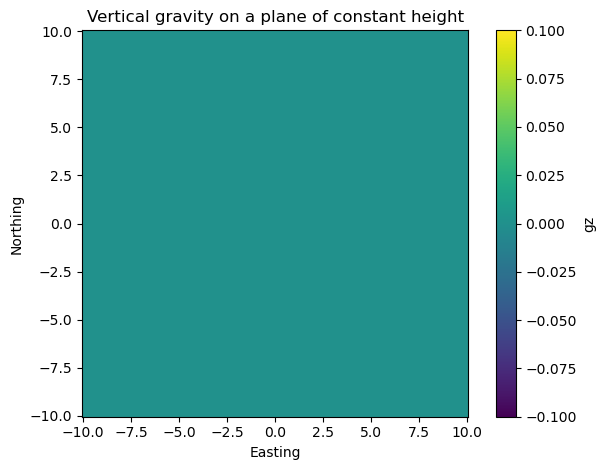

In [8]:
plot_colourmap_gz(func=calculate_delta_gs_triaxial, spacing=0.1, region=(-10, 10, -10, 10), extra_coords=0, a=6, b=4, c=2, density=1000, topo_h=None)

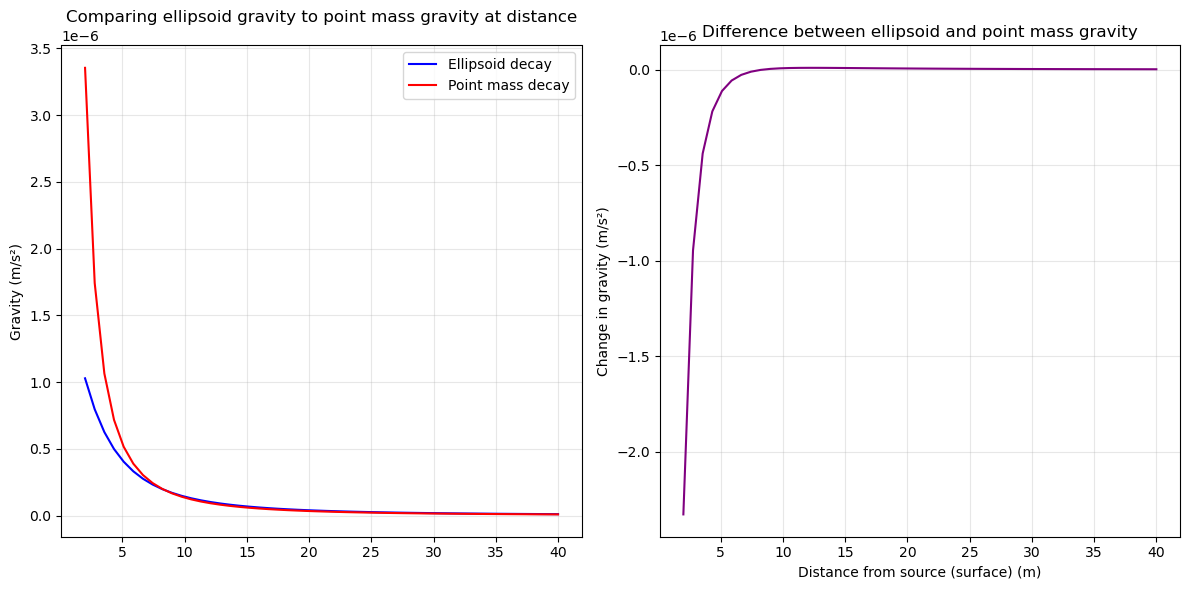

In [10]:
plot_gz_decay_comparison(calculate_delta_gs_triaxial, 50, 6, 4, 2, 1000)